## 🕹️ 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
&nbsp;
##### [프로그램 분석]
- LSTM과 GRU 셀에 대해서 알아보겠습니다

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [37]:
# 먼저, 훈련데이터와 검증데이터를 나누어봅시다.
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                    train_target,
                                                                    test_size=0.2,
                                                                    random_state=42)

In [38]:
# 패딩으로 한 문장당 길이를 100으로 맞춰주고요.
from keras.utils import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [39]:
# 가장 먼저 LSTM을 사용해보겠습니다. LSTM은 전 은닉층의 가중치를 기억해서, 결과를 도출합니다.
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [41]:
# 컴파일을 시키고
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# 훈련을 시키면
earlystopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq,
                    train_target,
                    validation_data=(val_seq, val_target),
                    callbacks=[earlystopping],
                    epochs=100,
                    batch_size=64)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5217 - loss: 0.6926 - val_accuracy: 0.5774 - val_loss: 0.6913
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5934 - loss: 0.6903 - val_accuracy: 0.6436 - val_loss: 0.6858
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6613 - loss: 0.6799 - val_accuracy: 0.6896 - val_loss: 0.6421
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7006 - loss: 0.6219 - val_accuracy: 0.7100 - val_loss: 0.5849
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7271 - loss: 0.5741 - val_accuracy: 0.7376 - val_loss: 0.5599
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7493 - loss: 0.5482 - val_accuracy: 0.7568 - val_loss: 0.5354
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7563 - loss: 0.5281 - val_accuracy: 0.7568 - val_loss: 0.5199
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7682 - loss: 0.5104 - 

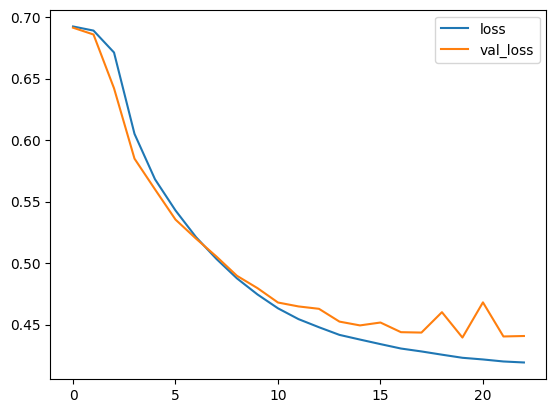

In [14]:
# 다음과 같은 그래프가 나옵니다.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [42]:
# 이번에는 드롭아웃을 지정해서 과적합을 방지해볼게요.
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [43]:
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [22]:
earlystopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq,
           train_target,
           epochs=100,
           batch_size=64,
           validation_data=(val_seq, val_target),
           callbacks=[earlystopping])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5071 - loss: 0.6930 - val_accuracy: 0.5394 - val_loss: 0.6921
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5671 - loss: 0.6914 - val_accuracy: 0.5968 - val_loss: 0.6898
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5977 - loss: 0.6889 - val_accuracy: 0.6260 - val_loss: 0.6856
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6284 - loss: 0.6826 - val_accuracy: 0.6684 - val_loss: 0.6713
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6648 - loss: 0.6573 - val_accuracy: 0.7180 - val_loss: 0.5977
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7182 - loss: 0.5885 - val_accuracy: 0.7330 - val_loss: 0.5663
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7330 - loss: 0.5600 - val_accuracy: 0.7472 - val_loss: 0.5434
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7533 - loss: 0.5360 - 

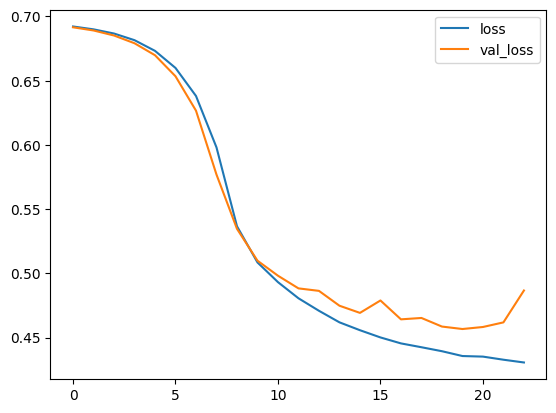

In [44]:
# 과적합이 좀 줄어든 것 같네요.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [45]:
# 세번째는 두개의 LSTM층을 구성을 하고, return_sequences를 True로 설정하면, 전은닉층의 가중치의 값을 반환합니다.
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [27]:
model3.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [28]:
earlystopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq,
           train_target,
           epochs=100,
           batch_size=64,
           validation_data=(val_seq, val_target),
           callbacks=[earlystopping])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5010 - loss: 0.6931 - val_accuracy: 0.5216 - val_loss: 0.6929
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5290 - loss: 0.6926 - val_accuracy: 0.5840 - val_loss: 0.6920
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5619 - loss: 0.6916 - val_accuracy: 0.6026 - val_loss: 0.6893
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5928 - loss: 0.6873 - val_accuracy: 0.6204 - val_loss: 0.6781
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6384 - loss: 0.6677 - val_accuracy: 0.6758 - val_loss: 0.6288
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6860 - loss: 0.6159 - val_accuracy: 0.7150 - val_loss: 0.5761
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7091 - loss: 0.5761 - val_accuracy: 0.7148 - val_loss: 0.5720
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7355 - loss: 0.5445 - 

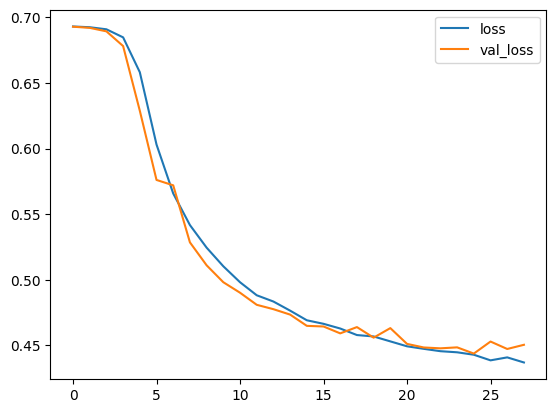

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [46]:
# 이번에는 GRU를 사용해볼게요.
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [35]:
model4.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])
earlystopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq,
           train_target,
           epochs=100,
           batch_size=64,
           validation_data=(val_seq, val_target),
           callbacks=[earlystopping])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5157 - loss: 0.6926 - val_accuracy: 0.5402 - val_loss: 0.6916
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5625 - loss: 0.6905 - val_accuracy: 0.5644 - val_loss: 0.6891
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5795 - loss: 0.6878 - val_accuracy: 0.5888 - val_loss: 0.6852
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6092 - loss: 0.6826 - val_accuracy: 0.6008 - val_loss: 0.6792
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6195 - loss: 0.6756 - val_accuracy: 0.6172 - val_loss: 0.6698
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6288 - loss: 0.6645 - val_accuracy: 0.6372 - val_loss: 0.6535
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6499 - loss: 0.6455 - val_accuracy: 0.6690 - val_loss: 0.6267
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6827 - loss: 0.6111 - 

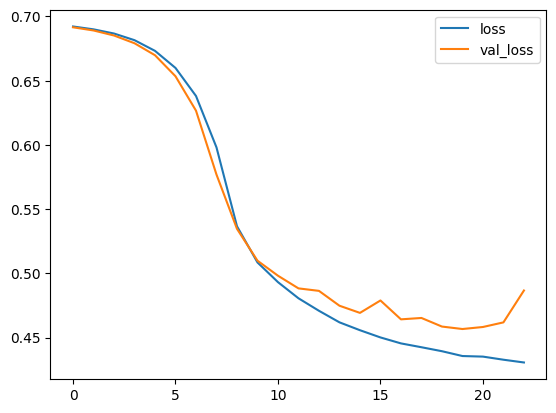

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])